<div>
<img src="opencosmo_simple_transparent.png" width="600">
</div>

# OpenCosmo Tutorial - lightcone data



<div class="alert alert-block alert-info"><b>Note: </b> This tutorial is a little different, we haven't incorporated lightcone quantities into the toolkit yet so it's a little more DIY, but we'll work out some basics together and then if you like you can explore more. This is why it's an advanced tutorial :)  </div> 
    

## The portal

First navigate to Halo LC Query  and select something like the following:


|Complete          |  Option |
|:------------------|:--------|
| start step               | 550 | 
| nsteps     | 50      | 
| M200c high | 1e16      | 
| M200c low| 1e14      | 
| theta high | 0.5      | 
| theta low| 0.1     | 
| phi high | 0.5      | 
| phi low| 0.1      | 
| max halos | 10000      | 


And if we're very lucky you'll get some halos! These are the standard mathematical theta, phi bounds on the lightcone in radians, as well as redshift slicing through the step number (500 is roughly z=0.15) and a mass cut. 

Then navigate to the CMB map query, and you can get hold of the CMB lensing map (with contributions up to z=5) from the Frontier E simulation to go along with it 


|Complete          |  Option |
|:------------------|:--------|
| cutout  | Leave unchecked      | 
| nside  | 1024      | 
| Right Ascension | 0.1 | 
| Declination | 0 | 
| Radius | 1 | 

Note it will ignore the RA/Dec (in degrees) and radius (degrees) if you leave the cutout button unchecked, but still requires valid values. Also you probably don't want to download nside 16384 maps to your laptop (trust me they're a pain to work with)



<div class="alert alert-block alert-info"><b>Note: </b> The map query uses RA/Dec in degrees, but the lightcone halos use theta/phi. This is simply based on how the data is stored and hasn't been updated for consistency yet. Sorry about that! </div> 


## Lightcone notes

We don't support lightcone quantities in the OpenCosmo toolkit just yet so you'll need to work with the data yourself, however I'll give you a few pointers which should make things a little easier. 

## Map inspection

We can read in the map, convert it to healpix format and visualize it. Let's create a cartesian projection of a given area, and then run the same portal using a higher resolution cutout of that area. Note this is all in nested ordering which you'll need to tell healpix

For this you'll want to install healsparse and healpy.

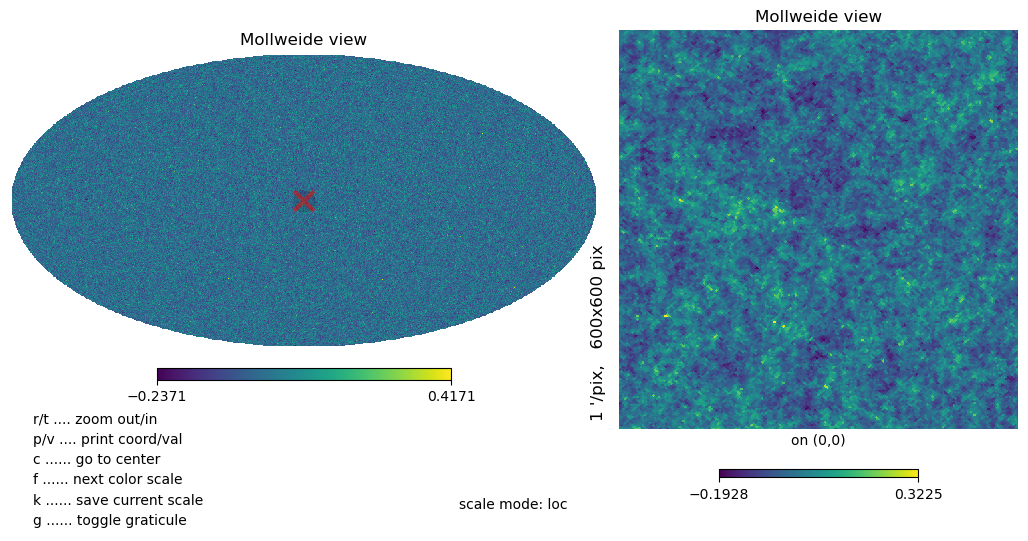

<Figure size 640x480 with 0 Axes>

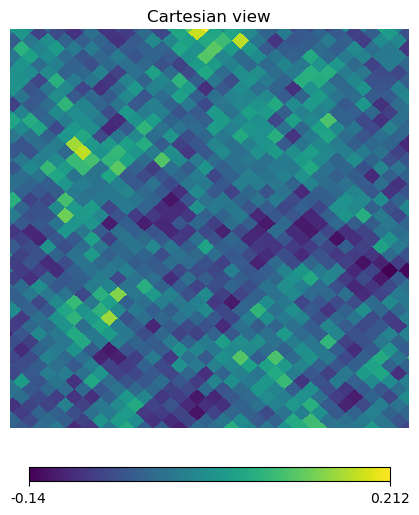

In [16]:
import healsparse as hsp 
import healpy as hp
import matplotlib.pyplot as plt
hsp_map = hsp.HealSparseMap.read('filtered_map.fits')

hp_map = hsp_map.generate_healpix_map(nside=1024)
hp.mollzoom(hp_map,nest=True)

plt.figure()
ra=100;dec=20; dx=1
hp.cartview(hp_map,nest=True,lonra=[ra-dx,ra+dx], latra=[dec-dx,dec+dx])
plt.show()

Now let's visualize the zoomed in data on the same scale. 

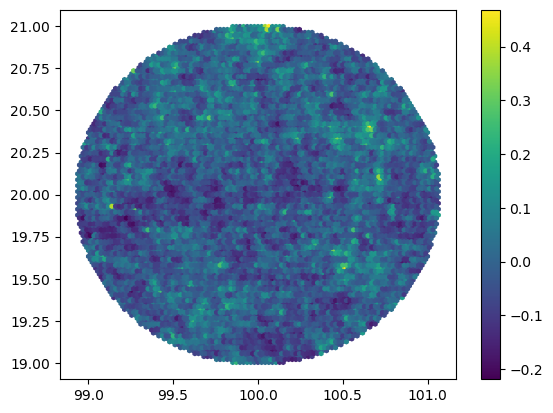

In [18]:
hsp_map = hsp.HealSparseMap.read('filtered_map-2.fits')

# Visualization of the map
plt.figure()
vpix, ra, dec = hsp_map.valid_pixels_pos(return_pixels=True)
plt.hexbin(ra, dec, C=hsp_map[vpix])
plt.colorbar()
plt.show()



<div class="alert alert-block alert-info"><b>Note: </b> With some versions of healpy there is a failure to load due to a scipy trapz issue. To fix that downgrade scipy to version 1.13.0  </div> 


## Halo lightcones 

Everything is in hdf5 format, with standard comoving HACC units with h factors. If there's unit confusion feel free to ask 

Let's start off just by reading the data. It should look something like 

```python
dataset = h5py.File('halolcproperties.hdf5','r')
print(dataset.keys())
fof_halo_mass = dataset['fof_halo_mass'][:]
fof_halo_center_x = dataset['fof_halo_x'][:]
```
and the same halo finder has been run on the lightcone so all the properties should look familiar. Some exceptions are the scale factor and the replication number. If you don't have the ra or declination, you can get this using healpy with 

```python
import healpy as hp
ra,dec = hp.vec2ang([x,y,z],lonlat=True)
```


In [24]:
import h5py
import numpy as np

dataset = h5py.File('filtered_haloproperties.hdf5','r')
print(dataset.keys())
fof_halo_mass = dataset['fof_halo_mass'][:]
fof_halo_center_x = dataset['fof_halo_center_x'][:]

print(np.log10(np.max(fof_halo_mass)))


<KeysViewHDF5 ['chi', 'fof_halo_center_x', 'fof_halo_center_y', 'fof_halo_center_z', 'fof_halo_mass', 'fof_halo_tag', 'phi', 'sod_halo_M200c', 'sod_halo_R200c', 'sod_halo_cdelta', 'theta']>
13.397377


## Challenges

- Find the most massive halo in the lightcone halo data. Make a kappa profile around this, and compare to the expected profile using the parameters from the halo properties in the halo lightcone catalog. Can you recover the signal?
- Make a comoving distance to redshift plot of the halo lightcones (this might seem silly but we've caught code bugs this way many times before)
- Can you find this most massive halo in the snapshot data? Does it look any different? Note that the fof halo tag is *not* constant between the lightcone and the snapshot, you'll need to find it by matching on proximity in position and mass. 